# Examen 2 - Portafolios de inversión - P2023. Tipo 1.

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/ac/Exchange_Financial_markets_Centrum_Pieniadza_NBP_AB.jpg" width="600px" height="400px" />

**Resumen.**
> Este examen pretende evaluar los conocimientos que hemos adquirido a lo largo de los dos módulos finales.

> El examen consta de dos partes. 
1. La primera es conceptual. Los cálculos que puede llegar a involucrar son bastante sencillos.
2. La segunda parte es práctica, como lo que se ha venido haciendo en las tareas. En esta parte deberás importar un archivo donde se encuentran reportados los precios ajustados en el cierre de dos compañías en una base diaria, deberás caracterizar los rendimientos y con base en ello construir fronteras media-varianza bajo ciertas condiciones. Finalmente deberás concluir de los resultados.

**Criterio de revisión.**
> Primera parte: tiene un valor del 40% del examen.

> Segunda parte: tiene un valor del 60% del examen. Se te calificará de acuerdo a los resultados finales que reportes, basados en tu análisis.

**Antes de comenzar.**
> Por favor, nombrar este archivo *Examen2_ApellidoNombre*, sin acentos y sin espacios; por ejemplo, en mi caso el archivo se llamaría *Examen2_JimenezEsteban*. Resolver todos los puntos en dicho archivo y subir a moodle.
___

## I. Primera parte (40 puntos)

**Pregunta 1.** (10 puntos) Escriba la fórmula del CAPM, en una celda de Markdown en formato LaTeX, especificando qué es cada uno de los términos que compone la ecuación.

$$E[r_i]-r_f = \beta_i(E[r_M]-r_f)$$

Donde: 

- $E[r_i]$ es el rendimiento del activo i.
- $\beta_i$ es la beta del activo i.
- $r_f$ es la tasa libre de riesgo.
- $E[r_M]$ es el rendimiento del portafolio de mercado.

**Pregunta 2.** (10 puntos) Explique en un párrafo corto cuál es la principal implicación del CAPM, es decir, qué es lo que determina el rendimiento esperado de un activo.

CAPM comenta que no debe de haber premio por asumir riesgo que se puede diversificar. O sea que los rendimientos aumentarán a medida que el riesgo no diversificable también lo haga. Lo que mide este riesgo es el $\beta$ (describe como se comporta el activo a comparación del mercado), por lo tanto, CAPM comenta que el premio al riesgo se basa únicamente en el $\beta$

**Pregunta 3.** (10 puntos) Una manera de medir la aversión al riesgo de un inversionista es comparando su equivalente de certerza. Los economistas definen el rendimiento equivalente de certeza $r_{CE}$ de un portafolio riesgoso, como el rendimieto seguro (libre de riesgo) que un inversionista aceptaría en lugar del portafolio riesgoso. Entonces, si un inversionista es más averso al riesgo, ¿esperaría que su $r_{CE}$ fuera mayor o menor?

**La respuesta correcta es:**
Entre más averso al riesgo, menor rendimiento libre de riesgo.

**Justificación:**
Por simple lógica podemos entender esta premisa, alguien que quiera salir de una situación incómoda, será más susceptible a aceptar cualquier tipo de condición o trato para alejarse de dicha situación. En este caso, la aversión al riesgo hace que aceptes menos rendimiento a cambio de ya no depender de ese riesgo; en cambio, si no eres muy averso al riesgo, no hay tanta prisa por cambiar de contexto, y el rendimiento a aceptar será mayor. 

In [17]:
# Portafolio riesgoso con rendimiento esperado y volatilidad de 10%
# y asignación del 50% del capital.
for i in range(1, 12, 2):
    rf = 0.1 - 0.5*i*(0.1**2)
    print("Tasa libre de riesgo aceptada {}%, coeficiente de aversión al riesgo de {}".format(round(rf, 2), i))

Tasa libre de riesgo aceptada 0.1, coeficiente de aversión al riesgo de 1
Tasa libre de riesgo aceptada 0.09, coeficiente de aversión al riesgo de 3
Tasa libre de riesgo aceptada 0.07, coeficiente de aversión al riesgo de 5
Tasa libre de riesgo aceptada 0.07, coeficiente de aversión al riesgo de 7
Tasa libre de riesgo aceptada 0.05, coeficiente de aversión al riesgo de 9
Tasa libre de riesgo aceptada 0.04, coeficiente de aversión al riesgo de 11


**Pregunta 4.** (10 puntos) Un fondo de inversiones con $\beta=0.8$ tiene un rendimiento esperado del $11.0644\%$. Si la tasa libre de riesgo es $1.0456\%$ y el rendimiento esperado del portafolio de mercado es del $13.5467\%$, ¿debería invertir en este fondo?

A. Si.

B. No.

**La respuesta correcta es:**
Si.

**Justificación:**
El rendimiento real es mayor al rendimiento teórico (subvalorado).

In [3]:
b = 0.8
eri = 0.110644
rf = 0.010456
erm = 0.135467

ert = rf + b*(erm-rf)

ert*100, eri*100

(11.04648, 11.064400000000001)

___
## II. Segunda parte (60 puntos)

En el curso hemos hablado que la teoría de portafolios moderna tiene que ver con un concepto base principal: **la diversificación**.

Hemos visto que la diversificación nos ayuda a reducir el riesgo idiosincrático. Sin embargo, también estudiamos que el riesgo puede ser tanto de perder como de ganar, entonces bajo este enfoque no podemos esperar rendimientos exhorbitantes. Por otra parte, sin importar los movimientos del mercado, la diversificación nos ayudará a tener éxito en el largo plazo.

David Swensen, en su libro Unconventional Success, nos provee una estructura de portafolio diversificado con base en diversos sectores. Entre los sectores se incluyen:
- Acciones de EEUU,
- Economías desarrolladas,
- Economías en desarrollo,
- Bienes raíces,
- Entre otros.

Para los anteriores sectores, podemos encontrar ETF's (Exchange Traded Fund) emitidos por la administradora Vanguard:
- Acciones de EEUU: Vanguard S&P 500 ETF (VOO).
- Economías desarrolladas: Vanguard FTSE Developed Markets Index Fund ETF Shares (VEA).
- Economías en desarrollo: Vanguard FTSE Emerging Markets Index Fund ETF Shares (VWO).
- Bienes raíces: Vanguard Real Estate Index Fund ETF Shares (VNQ).

In [37]:
import pandas as pd
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as pt
%matplotlib inline

**Punto 1 (10%).** En el archivo `prices_data.csv` se encuentran reportados los **precios mensuales ajustados en el cierre** de los ETF VOO, VEA, VWO, y VNQ, en dólares, desde inicios del 2011 hasta el úlimo mes reportado.

Adicionalmente, 

- la tasa de los Cetes a un mes reportados en la página de [Banxico](http://www.banxico.org.mx/) es de $6.68\%$, al 26 de Abril (esta tasa es anual).

1. Importar los **precios** de los ETF en un **DataFrame indizado por fecha** (5%): 
 - Mostrar la gráfica de estos precios.
 - Obtener un DataFrame con los **rendimientos porcentuales mensuales** para estos activos. Mostrar la gráfica de rendimientos.
 
2. Reportar en un **DataFrame el rendimiento esperado mensual y la volatilidad mensual** para cada uno de estos activos. Calcular las matrices de varianza-covarianza (**base mensual**) y de correlación (**base mensual**) para estos activos (5%).

                                 VEA        VNQ         VOO        VWO
Date                                                                  
2011-01-01 00:00:00-05:00  25.594753  35.397335   93.492592  33.429504
2011-02-01 00:00:00-05:00  26.530388  37.062878   96.733452  33.371971
2011-03-01 00:00:00-05:00  25.858124  36.202240   96.304504  35.198410
2011-04-01 00:00:00-04:00  27.468044  38.561440   99.576218  36.384865
2011-05-01 00:00:00-04:00  26.726233  39.091560   98.411316  35.313454
...                              ...        ...         ...        ...
2023-01-01 00:00:00-05:00  45.588573  90.156326  371.908722  42.199478
2023-02-01 00:00:00-05:00  44.004528  84.869324  362.616943  39.391506
2023-03-01 00:00:00-05:00  45.000782  82.215919  374.527924  40.370800
2023-04-01 00:00:00-04:00  46.360001  83.300003  382.049988  40.240002
2023-05-01 00:00:00-04:00  45.830002  81.279999  377.510010  39.689999

[149 rows x 4 columns]


Text(0.5, 1.0, 'Precios de ETFs')

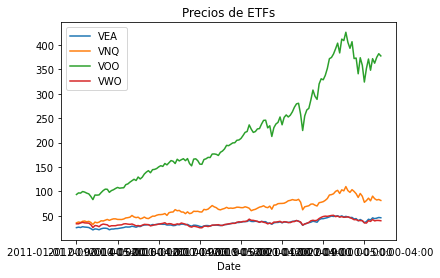

In [19]:
# 1
data = pd.read_csv("prices_data.csv", index_col=["Date"])
print(data)
data.plot()
pt.title("Precios de ETFs")

                                VEA       VNQ       VOO       VWO
Date                                                             
2011-02-01 00:00:00-05:00  0.036556  0.047053  0.034664 -0.001721
2011-03-01 00:00:00-05:00 -0.025339 -0.023221 -0.004434  0.054730
2011-04-01 00:00:00-04:00  0.062260  0.065167  0.033973  0.033708
2011-05-01 00:00:00-04:00 -0.027006  0.013747 -0.011699 -0.029447
2011-06-01 00:00:00-04:00 -0.012192 -0.041162 -0.021566 -0.009978
...                             ...       ...       ...       ...
2023-01-01 00:00:00-05:00  0.103099  0.119629  0.067992  0.101072
2023-02-01 00:00:00-05:00 -0.034747 -0.058643 -0.024984 -0.066540
2023-03-01 00:00:00-05:00  0.022640 -0.031265  0.032847  0.024861
2023-04-01 00:00:00-04:00  0.030204  0.013186  0.020084 -0.003240
2023-05-01 00:00:00-04:00 -0.011432 -0.024250 -0.011883 -0.013668

[148 rows x 4 columns]


Text(0.5, 1.0, 'Rendimientos mensuales de ETFs')

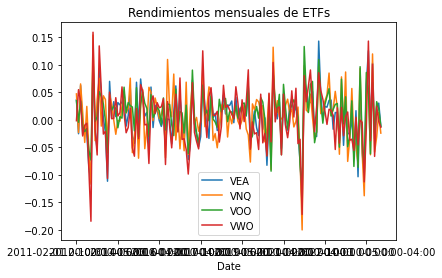

In [21]:
ret = data.pct_change().dropna()
print(ret)
ret.plot()
pt.title("Rendimientos mensuales de ETFs")

In [22]:
# 2
summ = pd.DataFrame({"Media": ret.mean(), "Volatilidad": ret.std()}).T
summ

,VEA,VNQ,VOO,VWO
Media,0.005061,0.006977,0.010382,0.002571
Volatilidad,0.047276,0.051753,0.042697,0.053071


In [25]:
cov = ret.cov()
print(cov)
corr = ret.corr()
print()
print(corr)

          VEA       VNQ       VOO       VWO
VEA  0.002235  0.001682  0.001761  0.002083
VNQ  0.001682  0.002678  0.001638  0.001607
VOO  0.001761  0.001638  0.001823  0.001603
VWO  0.002083  0.001607  0.001603  0.002816

          VEA       VNQ       VOO       VWO
VEA  1.000000  0.687598  0.872308  0.830366
VNQ  0.687598  1.000000  0.741289  0.585243
VOO  0.872308  0.741289  1.000000  0.707386
VWO  0.830366  0.585243  0.707386  1.000000


**Punto 2.** (20 puntos) Usando los datos del punto anterior:

1. Halle los pesos del portafolio de mínima varianza considerando todos los ETF. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (9 puntos).
2. Halle los pesos del portafolio EMV considerando todos los ETF. También reportar claramente el rendimiento esperado, volatilidad y cociente de Sharpe para dicho portafolio (9 puntos).
3. Halle la covarianza y la correlación entre los dos portafolios hallados (2 puntos).

In [55]:
# 1
def var(w, si):
    return w.T.dot(si).dot(w)

n = cov.shape[0]
w0 = np.ones(n)/n
cons = {"type": "eq", "fun": lambda w: w.sum() - 1}
bnds = n*((0, 1), )
rf = 0.0668/12

minvar = opt.minimize(
    fun = var,
    x0 = w0,
    args = (cov, ),
    bounds = bnds, 
    constraints = cons,
    tol = 1e-10
)

w_minvar = minvar.x
e_minvar = w_minvar.dot(summ.iloc[0, :])
s_minvar = w_minvar.T.dot(cov).dot(w_minvar)**0.5
r_minvar = (e_minvar - rf) / s_minvar

print("Pesos: ")
for i in range(4):
    print("{}: {}%".format(summ.columns.values[i],round(w_minvar[i]*100, 2)))
print()
print("Rendimiento esperado: {}%".format(round(e_minvar*100, 2)))
print("Volatilidad: {}%".format(round(s_minvar*100, 2)))
print("Ratio: {}".format(round(r_minvar, 4)))

Pesos: 
VEA: 0.0%
VNQ: 12.99%
VOO: 73.38%
VWO: 13.64%

Rendimiento esperado: 0.89%
Volatilidad: 4.21%
Ratio: 0.0786


In [57]:
# 2
def rs (w, eind, si, rf):
    ep = w.dot(eind)
    sp = (w.T.dot(si).dot(w))**0.5
    rs_me = -(ep - rf) / sp
    return rs_me

eind = summ.iloc[0, :]

emv = opt.minimize(
    fun = rs,
    x0 = w0,
    args = (eind, cov, rf),
    bounds = bnds,
    constraints = cons
)

w_emv = emv.x
e_emv = summ.iloc[0, 2]
s_emv = summ.iloc[1,2]
r_emv = (e_emv - rf) / s_emv

print("Pesos: ")
for i in range(4):
    print("{}: {}%".format(summ.columns.values[i],round(emv.x[i]*100, 2)))
print()
print("Rendimiento esperado: {}%".format(round(e_emv*100, 2)))
print("Volatilidad: {}%".format(round(s_emv*100, 2)))
print("Ratio: {}".format(round(r_emv, 4)))

Pesos: 
VEA: 0.0%
VNQ: 0.0%
VOO: 100.0%
VWO: 0.0%

Rendimiento esperado: 1.04%
Volatilidad: 4.27%
Ratio: 0.1128


In [58]:
# 3
print("Covarianza: {}".format(w_minvar.T.dot(cov).dot(w_emv)))
print("Correlación: {}".format(w_minvar.T.dot(cov).dot(w_emv)/(s_emv*s_minvar)))

Covarianza: 0.0017689590239976804
Correlación: 0.9850657860744303


**Punto 3.** (10 puntos) Con los portafolios que se encontraron en el punto anterior (de mínima varianza y EMV):

1. Construya la frontera de mínima varianza calculando el rendimiento esperado y volatilidad para varias combinaciones de los anteriores portafolios. Reportar dichas combinaciones en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (5 puntos).
2. También construya la línea de asignación de capital entre el activo libre de riesgo y el portafolio EMV. Reportar las combinaciones de estos activos en un DataFrame incluyendo pesos, rendimiento, volatilidad y cociente de Sharpe (5 puntos).

In [59]:
# 1 
n = 101
covport = w_minvar.T.dot(cov).dot(w_emv)
w = np.linspace(0, 1, n)

front = pd.DataFrame({
    "w_emv"       : w,
    "w_minvar"    : 1 - w,
    "media"       : w*e_emv + (1 - w)*e_minvar,
    "volatilidad" : ((w*s_emv)**2 + ((1 - w)*s_minvar)**2 + 2*(w*(1 - w)*covport))**0.5
})

front["ratio"] = (front["media"] - rf) / front["volatilidad"]
front

,w_emv,w_minvar,media,volatilidad,ratio
0,0.00,1.00,0.008874,0.042059,0.078647
1,0.01,0.99,0.008890,0.042059,0.079006
2,0.02,0.98,0.008905,0.042059,0.079364
3,0.03,0.97,0.008920,0.042060,0.079721
4,0.04,0.96,0.008935,0.042060,0.080079
...,...,...,...,...,...
96,0.96,0.04,0.010322,0.042647,0.111497
97,0.97,0.03,0.010337,0.042659,0.111818
98,0.98,0.02,0.010352,0.042672,0.112139
99,0.99,0.01,0.010367,0.042684,0.112460


In [61]:
# 2
s = np.linspace(0, 2, n)

lac = pd.DataFrame({
    "w_emv": s, 
    "w_fr": 1-s,
    "media": (s*e_emv) + (1-s)*rf, 
    "volatilidad" : s*s_emv
})

lac["ratio"] = (lac["media"] - rf) / lac["volatilidad"]
lac

,w_emv,w_fr,media,volatilidad,ratio
0,0.00,1.00,0.005567,0.000000,NaN
1,0.02,0.98,0.005663,0.000854,0.112779
2,0.04,0.96,0.005759,0.001708,0.112779
3,0.06,0.94,0.005856,0.002562,0.112779
4,0.08,0.92,0.005952,0.003416,0.112779
...,...,...,...,...,...
96,1.92,-0.92,0.014812,0.081977,0.112779
97,1.94,-0.94,0.014908,0.082831,0.112779
98,1.96,-0.96,0.015005,0.083685,0.112779
99,1.98,-0.98,0.015101,0.084539,0.112779


**Punto 4.** (20 puntos)

1. Usando todos los datos obtenidos, grafique:
 - los activos individuales,
 - portafolio de mínima varianza,
 - portafolio eficiente en media-varianza (EMV),
 - frontera de mínima varianza, y
 - línea de asignación de capital,
en el espacio de rendimiento (eje $y$) vs. volatilidad (eje $x$). Asegúrese de etiquetar todo y poner distintos colores para diferenciar los distintos elementos en su gráfico (10 puntos).
2. Suponga que usted está aconsejando a un cliente cuyo coeficiente de aversión al riesgo resultó ser 4. ¿Qué asignación de capital le sugeriría? ¿Qué significa esta asignación? ¿Cuánto debe invertir en cada activo? ¿Cuánto en el activo libre de riesgo? (10 puntos).

Text(0, 0.5, 'Rendimiento esperado')

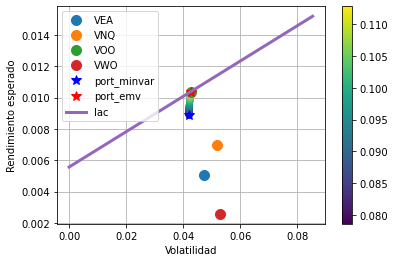

In [65]:
# 1
for i in summ:
    pt.plot(summ.loc["Volatilidad", i], summ.loc["Media", i], "o", ms = 10, label = i)
    
pt.plot(s_minvar, e_minvar, '*b', ms = 10, label = 'port_minvar')
pt.plot(s_emv, e_emv, '*r', ms = 10, label = 'port_emv')
pt.scatter(front["volatilidad"], front["media"], c = front["ratio"])
pt.plot(lac["volatilidad"], lac["media"], lw=3, label="lac")

pt.legend(loc = "upper left")
pt.grid()
pt.colorbar()
pt.xlabel("Volatilidad")
pt.ylabel("Rendimiento esperado")

In [66]:
# 2 
g = 4
w_opt = (e_emv - rf) / (g * (s_emv**2))

w_opt, 1-w_opt

(0.6603535215017036, 0.33964647849829643)

Le sugiero invertir el 66% de su capital en el portafolio óptimo y un 34% en el activo libre de riesgo. 

Invertir completamente en VOO (66%).

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>